In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from keras.models import load_model

from sklearn.metrics import accuracy_score

%matplotlib inline

Using TensorFlow backend.


In [2]:
grid_df = pd.read_pickle('./model_data/grid_{}.pkl'.format('06'))
# grid_df = pd.read_pickle('G:\Il mio Drive\Colab Notebooks\deep_mouse\model_data/grid_{}.pkl'.format('08'))

In [3]:
df_32 = grid_df.loc[grid_df["batch_size"]==32]
histories = iter(df_32.fit_out.reset_index(drop=True))
a = 0

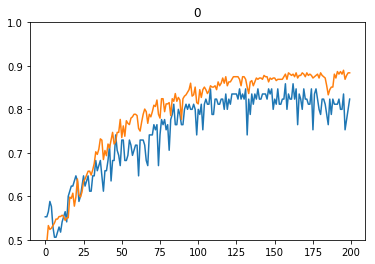

In [4]:
history = next(histories)

y_val = history.history['val_acc']
y_train = history.history['acc']

plt.plot(y_val)
plt.plot(y_train)
plt.ylim(0.5,1)
plt.title(a)
a = a+1

In [84]:
best_bodel_path = grid_df.loc[grid_df["batch_size"]==32].reset_index(drop=True).loc[2]['best_model_path']

In [95]:
best_model = load_model('./models/04/best_model_04_6.pkl')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [16]:
print(*grid_df.columns, sep='\n')

LSTM_size
batch_size
batch_size_data
best_model_accuracy
best_model_metric
best_model_path
epochs
fit_out
index
input_shape
learning_rate
params
seed_model
seed_numpy
seed_random
seed_skf
seed_sklearn
seed_tensorflow
sigma_cut
skf_n_splits
skf_split
test_size
training_metric
version
x_std
y_std


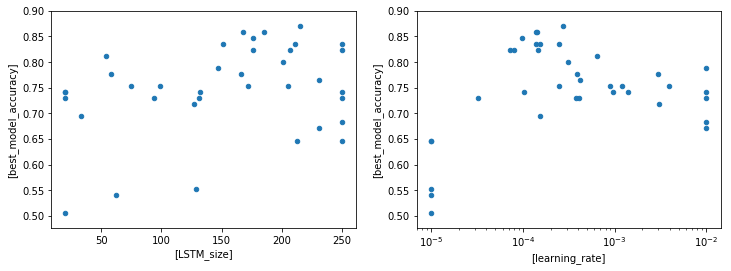

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

grid_df.plot(['LSTM_size'], ['best_model_accuracy'], kind='scatter', ax=ax1)
grid_df.plot(['learning_rate'], ['best_model_accuracy'], kind='scatter', ax=ax2, logx=True)



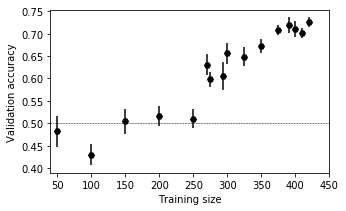

In [35]:
concat_path = './model_data/grid_mix2_{}.pkl'.format('08')
df = pd.read_pickle(concat_path)

fig, ax = plt.subplots(1, figsize=(5, 3))

for fo, ts in zip(df.fit_outs, df.training_size):
    somma = [x.history['val_acc'] for x in fo]
    s = np.mean(somma, 0)[130:180].mean()
    err = np.mean(somma, 0)[130:180].std()
    ax.errorbar(ts, s, err, fmt='H', color='black')
    
ax.hlines(0.5, 0, 550, linestyles='--', linewidth= 0.5)
ax.set_xlim(40, 450)
ax.set(xlabel='Training size', ylabel='Validation accuracy');

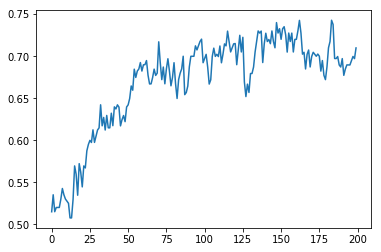

In [57]:
fo = df[df.training_size==400].fit_outs.iloc[0]
somma = [x.history['val_acc'] for x in fo]
plt.plot(np.mean(somma, 0))

0.4823394030332566
0.5168934966947974
0.7111889377925373
0.6557560227408459
0.6720000000459808


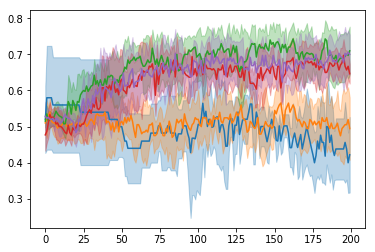

In [31]:
for fo in df.fit_outs[:]:
    somma = [x.history['val_acc'] for x in fo]
    print(np.mean(somma, 0)[130:180].mean())
    line, = plt.plot(np.mean(somma, 0))
    plt.fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
                    color=line.get_color(), alpha=0.3)
    
#     somma = [x.history['acc'] for x in fo]
#     line, = plt.plot(np.mean(somma, 0))
#     plt.fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
#                     color=line.get_color(), alpha=0.3)

## Version 7

In [192]:
VERSION = '07'

local_path = './model_data/grid_{}.pkl'.format(VERSION)
drive_path = 'G:/Il mio Drive/Colab Notebooks/deep_mouse/model_data/grid_{}.pkl'.format(VERSION)


local_df = pd.read_pickle(local_path)
colab_df = pd.read_pickle(drive_path)

print(f'Local: {local_df.shape[0]}, drive: {colab_df.shape[0]}')

concat_path = './model_data/grid_mix_{}.pkl'.format(VERSION)
df = pd.concat([colab_df, local_df], axis=0, ignore_index=True)
df.to_pickle(concat_path)

Local: 3, drive: 12


[Text(0, 0.5, 'dropout'), Text(0.5, 0, 'LSTM size')]

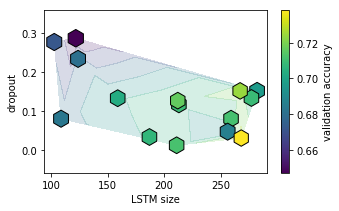

In [199]:
VERSION = '07'

concat_path = './model_data/grid_mix_{}.pkl'.format(VERSION)
combined_df = pd.read_pickle(concat_path)

xyz = np.ones([4, combined_df.shape[0]])

for index, (lstm_size, dropout, fits_outs) in combined_df[['LSTM_size', 'dropout', 'fit_outs']].iterrows():
    somma = [x.history['val_acc'] for x in fits_outs]    
    s = np.mean(somma, 0)[130:].mean()
    sigma = np.mean(somma, 0)[130:].std()

    xyz[0, index] = lstm_size
    xyz[1, index] = dropout
    xyz[2, index] = s
    xyz[3, index] = sigma

fig, ax = plt.subplots(1, figsize=(5, 3))
scatterplot = ax.scatter(xyz[0,:], xyz[1,:], c=xyz[2,:], s=1/(xyz[2,:])*2e2, zorder=10, marker='h', edgecolors='black')
ax.tricontourf(xyz[0,:], xyz[1,:], xyz[2,:], alpha=0.2, zorder=3)
plt.colorbar(scatterplot, label='validation accuracy')
ax.set(**{'xlabel':'LSTM size', 'ylabel':'dropout'})
# fig.savefig(f'./plots/LSTM_VS_dropout.png', bbox_inches='tight')

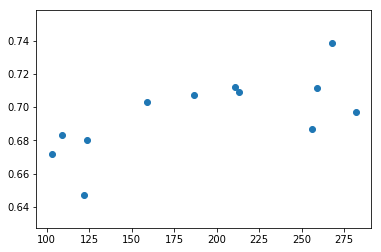

In [15]:
plt.scatter(xyz[0,:], xyz[2,:])

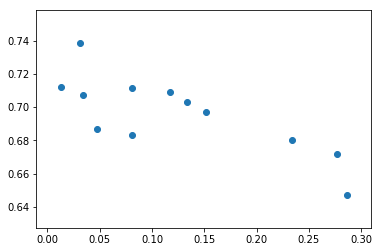

In [17]:
plt.scatter(xyz[1,:], xyz[2,:])

## Version 9

In [225]:
VERSION = '09'

local_path = './model_data/grid_{}.pkl'.format(VERSION)
drive_path = 'G:/Il mio Drive/Colab Notebooks/deep_mouse/model_data/grid_{}.pkl'.format(VERSION)


#local_df = pd.read_pickle(local_path)
colab_df = pd.read_pickle(drive_path)

#print(f'Local: {local_df.shape[0]}, drive: {colab_df.shape[0]}')

#concat_path = './model_data/grid_mix_{}.pkl'.format(VERSION)
#df = pd.concat([colab_df, local_df], axis=0, ignore_index=True)
#df.to_pickle(concat_path)
df = colab_df

0.5410266522169114
0.5668446556462281
0.540842318004056
0.6140106940970701
nan


C:\Users\aamico\AppData\Local\Continuum\anaconda3\envs\deep_mouse\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice.
  This is separate from the ipykernel package so we can avoid doing imports until


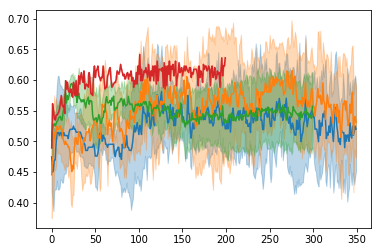

In [228]:
for fo in df.fit_outs[:]:
    somma = [x.history['val_acc'] for x in fo]
    print(np.mean(somma, 0)[130:180].mean())
    line, = plt.plot(np.mean(somma, 0))
    plt.fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
                    color=line.get_color(), alpha=0.3)
    
#     somma = [x.history['acc'] for x in fo]
#     line, = plt.plot(np.mean(somma, 0))
#     plt.fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
#                     color=line.get_color(), alpha=0.3)
# for fo in df.fit_outs[:]:
#     somma = [x.history['loss'] for x in fo]
#     print(np.mean(somma, 0)[130:180].mean())
#     line, = plt.plot(np.mean(somma, 0))
#     plt.fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
#                     color=line.get_color(), alpha=0.3)
    
#     somma = [x.history['acc'] for x in fo]
#     line, = plt.plot(np.mean(somma, 0))
#     plt.fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
#                     color=line.get_color(), alpha=0.3)

In [227]:
colab_df.iloc[-1].fit_outs[0].history

{'val_loss': [0.6969062539345441],
 'val_acc': [0.566844920423579],
 'loss': [0.6506155380934238],
 'acc': [0.6005361944676724]}

## ver 10

In [112]:
VERSION = '10'

#local_path = './model_data/grid_{}.pkl'.format(VERSION)
drive_path = 'G:/Il mio Drive/Colab Notebooks/deep_mouse/model_data/grid_{}.pkl'.format(VERSION)

#local_df = pd.read_pickle(local_path)
colab_df = pd.read_pickle(drive_path)

#print(f'Local: {local_df.shape[0]}, drive: {colab_df.shape[0]}')

#concat_path = './model_data/grid_mix_{}.pkl'.format(VERSION)
#df = pd.concat([colab_df, local_df], axis=0, ignore_index=True)
#df.to_pickle(concat_path)
df = colab_df

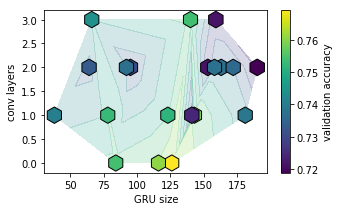

In [180]:
# df = df[df.best_model_accuracies.apply(lambda x:len(x))==5].reset_index()

xyz = np.ones([4, df.shape[0]])

for index, (gru_size, conv_layers, fits_outs) in df[['GRU_size', 'conv_layers', 'fit_outs']].iterrows():
    somma = [x.history['val_acc'] for x in fits_outs]    
    s = np.mean(somma, 0)[170:190].mean()
    sigma = np.mean(somma, 0)[170:190].std()

    xyz[0, index] = gru_size
    xyz[1, index] = conv_layers
    xyz[2, index] = s
    xyz[3, index] = sigma


fig, ax = plt.subplots(1, figsize=(5, 3))
scatterplot = plt.scatter(xyz[0,:], xyz[1,:], c=xyz[2,:], s=1/(xyz[2,:])*2e2, zorder=10, marker='h', edgecolors='black')
ax.tricontourf(xyz[0,:], xyz[1,:], xyz[2,:], alpha=0.2, zorder=3)
plt.colorbar(scatterplot, label='validation accuracy')
ax.set(**{'xlabel':'GRU size', 'ylabel':'conv layers'})

# fig.savefig(f'./plots/conv_layer_number_contourf.png', bbox_inches='tight')

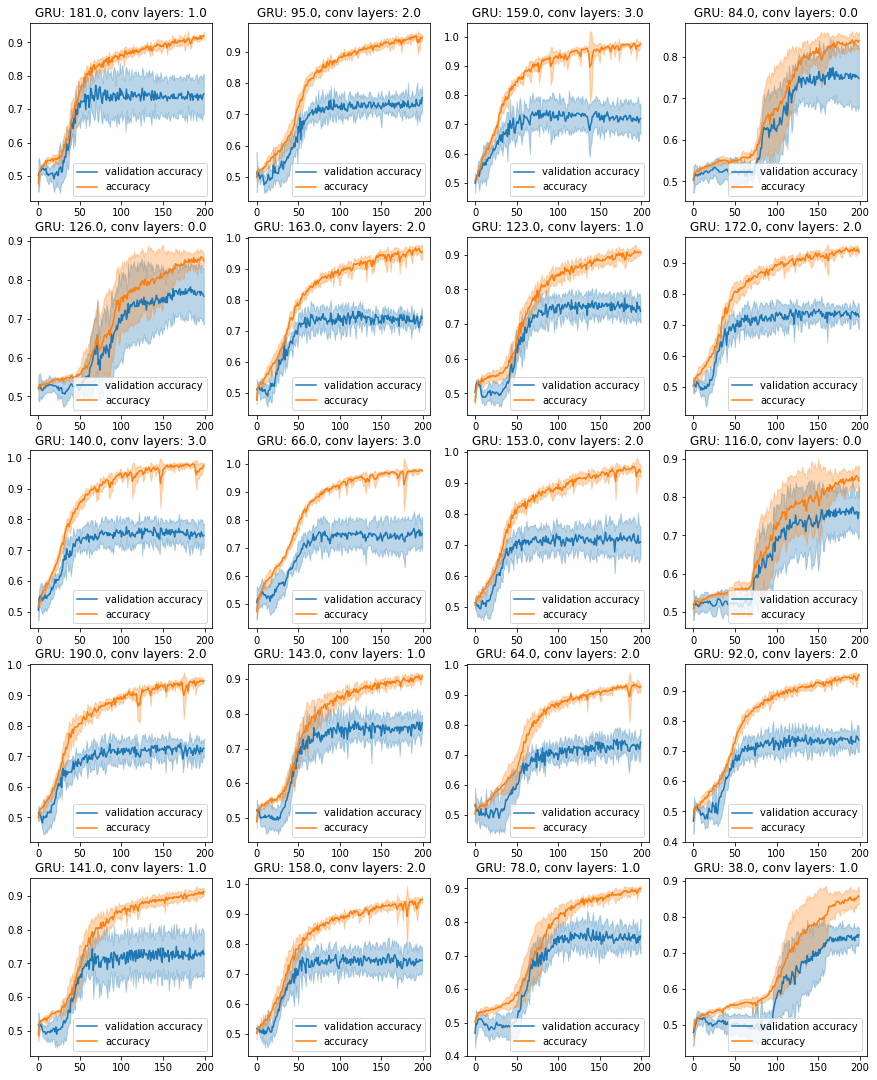

In [179]:
fig, ax = plt.subplots(int(np.ceil(df.shape[0]/4)),4, figsize=(15, 19))


for index, (gru_size, n_layers, fo) in df[['GRU_size', 'conv_layers', 'fit_outs']].iterrows():

    column = index%4
    row = int(index/4)


    somma = [x.history['val_acc'] for x in fo]
    line, = ax[row, column].plot(np.mean(somma, 0), label='validation accuracy')
    ax[row, column].fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
                    color=line.get_color(), alpha=0.3)
    
    somma = [x.history['acc'] for x in fo]
    line, = ax[row, column].plot(np.mean(somma, 0), label='accuracy')
    ax[row, column].fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
                    color=line.get_color(), alpha=0.3)
    ax[row, column].set_title(f'GRU: {gru_size}, conv layers: {n_layers}')
    ax[row, column].legend(loc=4)
    
# fig.savefig(f'./plots/gru_size_conv_layer.png', bbox_inches='tight')

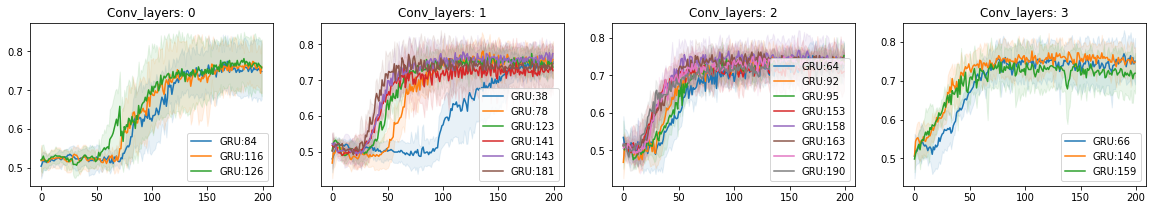

In [178]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
for i in range(4):
    for index, df_row in df.query('conv_layers==@i').sort_values(by='GRU_size').iterrows():
        somma = [x.history['val_acc'] for x in df_row.fit_outs]
        line, = ax[i].plot(np.mean(somma, 0), label=f'GRU:{int(df_row.GRU_size)}')
        ax[i].fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
                        color=line.get_color(), alpha=0.1)
        ax[i].set_title(f'Conv_layers: {i}')
        ax[i].legend(loc=4)
        
# fig.savefig(f'./plots/conv_layer_number.png', bbox_inches='tight')

## version 11

In [311]:
VERSION = '11'

#local_path = './model_data/grid_{}.pkl'.format(VERSION)
drive_path = 'G:/Il mio Drive/Colab Notebooks/deep_mouse/model_data/grid_{}.pkl'.format(VERSION)

#local_df = pd.read_pickle(local_path)
colab_df = pd.read_pickle(drive_path)

#print(f'Local: {local_df.shape[0]}, drive: {colab_df.shape[0]}')

#concat_path = './model_data/grid_mix_{}.pkl'.format(VERSION)
#df = pd.concat([colab_df, local_df], axis=0, ignore_index=True)
#df.to_pickle(concat_path)
df = colab_df
df = df[df.best_model_accuracies.apply(lambda x:len(x))==5].reset_index()


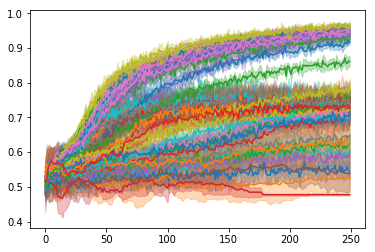

In [302]:
for fo in df.fit_outs[:]:
    somma = [x.history['acc'] for x in fo]
    line, = plt.plot(np.mean(somma, 0))
    plt.fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
                    color=line.get_color(), alpha=0.3)
    
    somma = [x.history['val_acc'] for x in fo]
    line, = plt.plot(np.mean(somma, 0))
    plt.fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
                    color=line.get_color(), alpha=0.3)

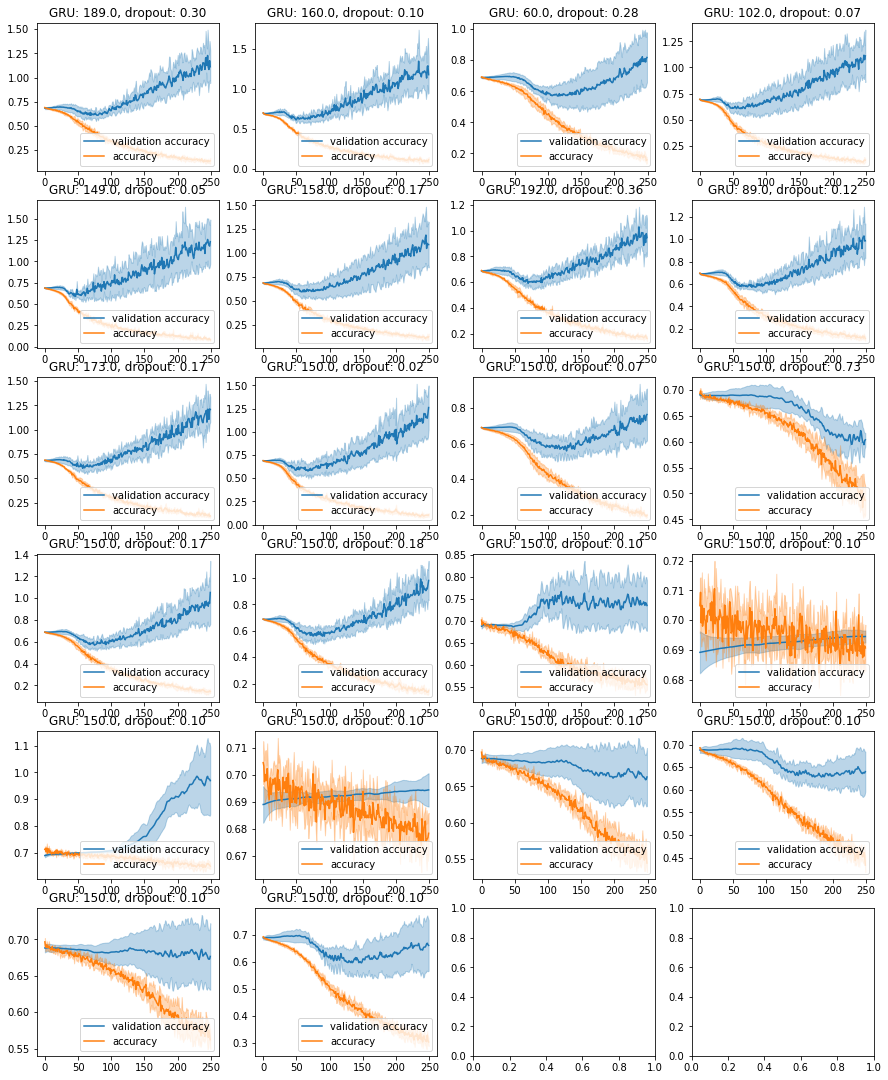

In [303]:
fig, ax = plt.subplots(int(np.ceil(df.shape[0]/4)),4, figsize=(15, 19))
for index, (gru_size, dropout, fo) in df[['GRU_size', 'dropout', 'fit_outs']].iterrows():

    column = index%4
    row = int(index/4)


    somma = [x.history['val_loss'] for x in fo]
    line, = ax[row, column].plot(np.mean(somma, 0), label='validation accuracy')
    ax[row, column].fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
                    color=line.get_color(), alpha=0.3)
    
    somma = [x.history['loss'] for x in fo]
    line, = ax[row, column].plot(np.mean(somma, 0), label='accuracy')
    ax[row, column].fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
                    color=line.get_color(), alpha=0.3)
    ax[row, column].set_title(f'GRU: {gru_size}, dropout: {dropout:.2f}')
    ax[row, column].legend(loc=4)
    
# fig.savefig(f'./plots/gru_size_conv_layer.png', bbox_inches='tight')

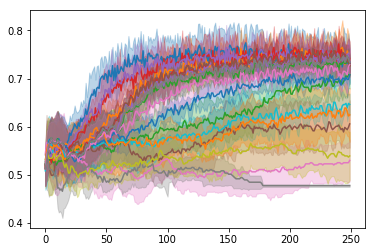

In [309]:

for fo in df.query('batch_size!=32').fit_outs[:]:
    somma = [x.history['acc'] for x in fo]
#     print(np.mean(somma, 0)[130:180].mean())
#     line, = plt.plot(np.mean(somma, 0))
#     plt.fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
#                     color=line.get_color(), alpha=0.3)
    
    somma = [x.history['val_acc'] for x in fo]
    line, = plt.plot(np.mean(somma, 0))
    plt.fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
                    color=line.get_color(), alpha=0.3)

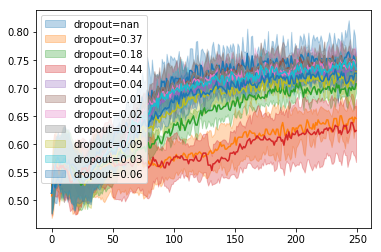

In [312]:
xy = []


for index, row in df[np.isclose(df.batch_size, 128) & np.isclose(df.learning_rate, 1.3e-4)].iterrows():
    fo = row.fit_outs
    somma = [x.history['acc'] for x in fo]

#     line, = plt.plot(np.mean(somma, 0))
#     plt.fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
#                     color=line.get_color(), alpha=0.3,
#                     label=f'dropout={row.conv_dropout:.2f}')
    
    
    somma = [x.history['val_acc'] for x in fo]
    line, = plt.plot(np.mean(somma, 0))
    plt.fill_between(range(np.mean(somma, 0).shape[0]),np.mean(somma, 0)-np.std(somma, 0), np.mean(somma, 0)+np.std(somma, 0),
                    color=line.get_color(), alpha=0.3, label=f'dropout={row.conv_dropout:.2f}')
    xy.append([row.conv_dropout, np.mean(somma, 0))

plt.legend()